This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

After you register, you will be provided with a unique API key, that you should store:

In [1]:
# [API_KEY is not required !]
#
# Store the API key as a string - according to PEP8, constants are always named in all upper case
# API_KEY = 'YOUR_API_KEY_HERE'


Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exchange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/ ).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [2]:
# First, import the relevant modules
import requests

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

# To print some colored text output:
class fontstyle:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    BRIGHTGREEN = '\033[32m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    BACKGROUNDYELLOW = '\033[43m'
    BACKGROUNDLIGHTYELLOW = '\033[0;43m'
    END = '\033[0m'
    
# Use the following to print colored and bold text
# print(fontstyle.BOLD + fontstyle.UNDERLINE +  fontstyle.CYAN + fontstyle.BACKGROUNDYELLOW + 'Hello World !' + fontstyle.END)

Note: API's can change a bit with each version, for this exercise it is reccomended to use the "V3" quandl api at `https://www.quandl.com/api/v3/`

## Steps to verify {database_code} and {dataset_code}:

Since it is difficult find them directly through quandl website, follow the steps below:

* Search in google: "Frankfurt Stock Exchange quandl database code".

* Click on the link (see picture): FSE/RHM_X - Quandl (https://www.quandl.com/data/FSE/RHM_X-Rheinmetall-RHM_X)

<div>
<img src="QuandlFreeDatabase_1.png" width="500"/>
</div>

* You are now within quandl (https://www.quandl.com/data/FSE/RHM_X-Rheinmetall-RHM_X). Click the 'back' button to go to the main page of Frankfurt Stock Exchange (Do not click the browser back button). See picture.

<div>
<img src="QuandlFreeDatabase_2.png" width="300"/>
</div>

* You are now in Frankfurt Stock Exchange database. Verify that it's Free Data. 

<div>
<img src="QuandlFreeDatabase_3.png" width="600"/>
</div>


* You can either browse all the 160 tickers or just search for the company of your interest: Carl Zeiss Meditec.

<div>
<img src="QuandlFreeDatabase_4.png" width="600"/>
</div>


* Once you click on the company name, you will find all the details that you possibly need. By default, the entire time-series will be presented. I have only selected the data for the entire 2017 year to see how it's supposed to look in their website. Here, I have chosen to show the `closing price` for the entire year 2017. Another interesting thing I found is link under "Validate". It's referring to XFRA which is a paid database.

<div>
<img src="QuandlFreeDatabase_5.png" width="800"/>
</div>



In [3]:
# Pre-task 1a: Collect data from the Franfurt Stock Exchange, for the ticker AFX_X
#
# Define a function to create the specific url
# More details: https://docs.quandl.com/docs/parameters-2
def determine_url(start_date,end_date):
    database_code = 'FSE'
    dataset_code = 'AFX_X'
    file_format = 'json' # 'json' or 'csv'. See: https://docs.quandl.com/docs/in-depth-usage
    url = 'https://www.quandl.com/api/v3/datasets/'+database_code+'/'+dataset_code
    url = url + '/data.' + file_format + '?start_date='+start_date+'&end_date='+end_date

    # Return data in ascending order
    url = url + '&order=asc'

    return url


In [4]:
# Pre-task 1b: Collect data from the Franfurt Stock Exchange, for the ticker AFX_X
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned

# Instead of just one day, we are going to pull data for 3 days.
start_date = '2017-01-02'
end_date = '2017-01-04'
url = determine_url(start_date,end_date)
print(url)

https://www.quandl.com/api/v3/datasets/FSE/AFX_X/data.json?start_date=2017-01-02&end_date=2017-01-04&order=asc


In [5]:
# Pre-task 1c: Collect data from the Franfurt Stock Exchange, for the ticker AFX_X
# Make a request to get the webpage in the "Response" object, r.
r = requests.get(url)

In [6]:
# The object r is a JSON Response object
type(r)

requests.models.Response

In [7]:
text = r.text
print(text)

{"dataset_data":{"limit":null,"transform":null,"column_index":null,"column_names":["Date","Open","High","Low","Close","Change","Traded Volume","Turnover","Last Price of the Day","Daily Traded Units","Daily Turnover"],"start_date":"2017-01-02","end_date":"2017-01-04","frequency":"daily","data":[["2017-01-02",34.99,35.94,34.99,35.8,null,44700.0,1590561.0,null,null,null],["2017-01-03",35.9,35.93,35.34,35.48,null,70618.0,2515473.0,null,null,null],["2017-01-04",35.48,35.51,34.75,35.19,null,54408.0,1906810.0,null,null,null]],"collapse":null,"order":"asc"}}


In [8]:
# Inspect the JSON structure of the object created above, and take note of how nested it is,
# as well as the overall structure

In [9]:
# Pre-task 2a: Convert the returned JSON object into a Python dictionary
json_data = r.json()
for key, value in json_data.items():
    print(key + ':', value)

dataset_data: {'limit': None, 'transform': None, 'column_index': None, 'column_names': ['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'], 'start_date': '2017-01-02', 'end_date': '2017-01-04', 'frequency': 'daily', 'data': [['2017-01-02', 34.99, 35.94, 34.99, 35.8, None, 44700.0, 1590561.0, None, None, None], ['2017-01-03', 35.9, 35.93, 35.34, 35.48, None, 70618.0, 2515473.0, None, None, None], ['2017-01-04', 35.48, 35.51, 34.75, 35.19, None, 54408.0, 1906810.0, None, None, None]], 'collapse': None, 'order': 'asc'}


In [10]:
type(json_data)

dict

### Inspect how nested the JSON structure of the dictionary object, `json_data`, is.

In [11]:
# Pre-task 2b: Convert the returned JSON object into a Python dictionary
json_data

{'dataset_data': {'limit': None,
  'transform': None,
  'column_index': None,
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Change',
   'Traded Volume',
   'Turnover',
   'Last Price of the Day',
   'Daily Traded Units',
   'Daily Turnover'],
  'start_date': '2017-01-02',
  'end_date': '2017-01-04',
  'frequency': 'daily',
  'data': [['2017-01-02',
    34.99,
    35.94,
    34.99,
    35.8,
    None,
    44700.0,
    1590561.0,
    None,
    None,
    None],
   ['2017-01-03',
    35.9,
    35.93,
    35.34,
    35.48,
    None,
    70618.0,
    2515473.0,
    None,
    None,
    None],
   ['2017-01-04',
    35.48,
    35.51,
    34.75,
    35.19,
    None,
    54408.0,
    1906810.0,
    None,
    None,
    None]],
  'collapse': None,
  'order': 'asc'}}

In [12]:
json_data['dataset_data']['data']

[['2017-01-02',
  34.99,
  35.94,
  34.99,
  35.8,
  None,
  44700.0,
  1590561.0,
  None,
  None,
  None],
 ['2017-01-03',
  35.9,
  35.93,
  35.34,
  35.48,
  None,
  70618.0,
  2515473.0,
  None,
  None,
  None],
 ['2017-01-04',
  35.48,
  35.51,
  34.75,
  35.19,
  None,
  54408.0,
  1906810.0,
  None,
  None,
  None]]

In [13]:
# Pre-task 3a: Calculate the highest and lowest opening prices
#
# Define function to extract the values of a specified column with 'colum_label'

def extractColumn(jsonData,colum_label):
    
    indexColumn = jsonData['dataset_data']['column_names'].index(colum_label)
    listColumn_values = []
    for datalist in jsonData['dataset_data']['data']:
        listColumn_values.append(datalist[indexColumn])
    
    return listColumn_values

In [14]:
# Pre-task 3b
openingPrices = extractColumn(json_data,'Open')
type(openingPrices), openingPrices, max(openingPrices), min(openingPrices)

(list, [34.99, 35.9, 35.48], 35.9, 34.99)

In [15]:
# Pre-task 4a: What was the largest change in any one day based on High and Low price?
#

# Define a function to extract the largest change in elements between two lists, 
# and the corresponding date from the JSON structure of the stcok price data.

def findMaxDiff_Date(list1,list2,jsonData):
    diff = list(map(lambda x, y: x - y, list1, list2))
    maxvalue = max(diff)
    
    indexDate = diff.index(maxvalue)
    maxvalueDate = jsonData['dataset_data']['data'][indexDate][0]
    
    return maxvalue, maxvalueDate



In [16]:
# Pre-task 4b
highPrices = extractColumn(json_data,'High')
lowPrices = extractColumn(json_data,'Low')

highPrices, lowPrices, findMaxDiff_Date(highPrices,lowPrices,json_data)


([35.94, 35.93, 35.51],
 [34.99, 35.34, 34.75],
 (0.9499999999999957, '2017-01-02'))

In [17]:
# Pre-task 5a: What was the largest change between any two days (based on Closing Price)?
# Here, we are going to find the maximum change between two **SUCCESSIVE** days and 
# the corresponding dates.
#
#
# Define a function to find the absolute differences between **SUCCESSIVE** elements of a 
# list, and then find the maximum of these absolute differences. Finally, also return the 
# those two dates from the JSON structure of the stcok price data.

def findMaxAbsDiffSuccessiveElements_Dates(list_num,jsonData):
    diffSuccessiveElements = [j-i for i, j in zip(list_num[:-1], list_num[1:])]
    absDiff = list(map(abs, diffSuccessiveElements))
    maxabsDiff = max(absDiff)
    
    indexDate1 = absDiff.index(maxabsDiff)
    indexDate2 = indexDate1 + 1
    maxDiffDate1 = jsonData['dataset_data']['data'][indexDate1][0]
    maxDiffDate2 = jsonData['dataset_data']['data'][indexDate2][0]
    
    return maxabsDiff, maxDiffDate1, maxDiffDate2


In [18]:
# Pre-task 5b
closingPrices = extractColumn(json_data,'Close')
closingPrices, findMaxAbsDiffSuccessiveElements_Dates(closingPrices,json_data)

([35.8, 35.48, 35.19], (0.3200000000000003, '2017-01-02', '2017-01-03'))

In [19]:
# Just checking manually
35.48-35.8, 35.19-35.48

(-0.3200000000000003, -0.28999999999999915)

In [20]:
# Pre-task 5a'
# If we consider **ANY** two days, then it's simply the difference between maximum and 
# minimum values, i.e., the range
#
#
# Define a function to find the corresponding change, and also return those dates from 
# the JSON structure of the stcok price data.

def findRange_Dates(list_num,jsonData):
    maxvalue = max(list_num)
    minvalue = min(list_num)
        
    maxvalueDate = jsonData['dataset_data']['data'][list_num.index(maxvalue)][0]
    minvalueDate = jsonData['dataset_data']['data'][list_num.index(minvalue)][0]
    
    rangevalue = maxvalue - minvalue

    return rangevalue, maxvalueDate, minvalueDate


In [21]:
# Pre-task 5b'
closingPrices, findRange_Dates(closingPrices,json_data)

([35.8, 35.48, 35.19], (0.6099999999999994, '2017-01-02', '2017-01-04'))

In [22]:
# Just checking manually
35.8 - 35.19

0.6099999999999994

In [23]:
# Pre-task 5c (additional interesting task):
#
# Define a function to find **MINIMUM** difference between ANY two (not necessarily 
# successive days) days, and also return the corresponding dates.
  
# Define a function to find the minimum difference between any pair of elements, and 
# also return the corresponding dates from the JSON structure of the stcok price data.

def findMinChange_Dates(list_num,jsonData):
    
    # Initialize difference as a large number
    mindiff = 10**20
    
    n = len(list_num)
      
    # Find the min diff by comparing difference 
    # of all possible pairs in given array
    for i in range(n-1): 
        for j in range(i+1,n): 
            if abs(list_num[i]-list_num[j]) < mindiff: 
                mindiff = abs(list_num[i] - list_num[j])
                indexDate1 = i
                indexDate2 = j
     
    date1 = jsonData['dataset_data']['data'][indexDate1][0]
    date2 = jsonData['dataset_data']['data'][indexDate2][0]
  
    # Return min diff 
    return mindiff, date1, date2
   

In [24]:
# Pre-task 5d
closingPrices, findMinChange_Dates(closingPrices,json_data)

([35.8, 35.48, 35.19], (0.28999999999999915, '2017-01-03', '2017-01-04'))

In [25]:
# Just checking manually
35.8-35.48, 35.8-35.19, 35.48-35.19

(0.3200000000000003, 0.6099999999999994, 0.28999999999999915)

In [26]:
# Pre-task 6a: What was the average daily trading volume?
#
# Define a function to find the mean of numbers of a list
def findMean(list_num):
    n = len(list_num)
    mean_list = sum(list_num)/n
    
    return mean_list

In [27]:
# Pre-task 6b
tradingVolumes = extractColumn(json_data,'Traded Volume')    
tradingVolumes, findMean(tradingVolumes)

([44700.0, 70618.0, 54408.0], 56575.333333333336)

In [28]:
# Pre-task 7a (Optional): What was the median trading volume?
#
# Define a function to find the median of numbers of a list

def findMedian(list_num):
    n = len(list_num)
    list_num = sorted(list_num)
    if n % 2 == 0:
        median1 = list_num[n//2]
        median2 = list_num[n//2 - 1]
        median_list = (median1 + median2)/2
    else:
        median_list = list_num[n//2]

    return median_list



In [29]:
tradingVolumes, findMedian(tradingVolumes)

([44700.0, 70618.0, 54408.0], 54408.0)

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

### Task 1

In [30]:
# Task 1: Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the 
# whole year 2017 (keep in mind that the date format is YYYY-MM-DD).

# Instead of 2017, we are going to pull a little more data than 2017 for now and then 
# manipulate the extracted data later to perform the required analysis only over the
# year 2017.

start_date = '2017-01-01'
end_date = '2017-12-31'
url2017 = determine_url(start_date,end_date)
print(url2017)

https://www.quandl.com/api/v3/datasets/FSE/AFX_X/data.json?start_date=2017-01-01&end_date=2017-12-31&order=asc


In [31]:
# Make the request to get the webpage in the "Response" object, r2017.
# Here, r2017 is the JSON Response object.

r2017 = requests.get(url2017)
type(r2017), r2017.status_code

(requests.models.Response, 200)

### Task 2

In [32]:
# Task 2: Convert the returned JSON object into a Python dictionary.

# Invoke the builtin JSON decoder to get the corresponding JSON data which is essentially
# a Python dictionary

json_data2017 = r2017.json()
type(json_data2017)

dict

### Task 3

In [33]:
# Task 3: Calculate what the highest and lowest opening prices were for the stock in this 
# period over the entire 2017.

dates2017 = extractColumn(json_data2017,'Date')
openingPrices2017 = extractColumn(json_data2017,'Open')
closingPrices2017 = extractColumn(json_data2017,'Close') 


In [34]:
None in openingPrices2017, len(openingPrices2017)

(True, 255)

There are some missing values in opening prices!

<u> **Note**</u> also that there are only records for 255 days of the entire yeasr 2017! Instead of filling all the values of the missing days, we will work with these 255 days. For this current mini-project, this is much better than filling all the missing days with data derived from the available 255 days because we are only focussing on estimating quantities like `maximum` price, `minimum` prices, price `range`, `mean`, `median`, and `average` daily trading volume. **Sensitivities** of these quantities with respect to the *derived* information from *available* infiormtion are either **theoretically** zero or **practically zero**.

In [35]:
None in closingPrices2017, len(closingPrices2017)

(False, 255)

Great! There are NO missing values in closing prices. Let's replace the missing opening prices by the closing prices of the previous day.

In [36]:
# Just checking the type of data of the first elements of the opening price and closing price lists.

type(openingPrices2017[0]), type(closingPrices2017[0])
                                                   

(float, float)

In [37]:
isinstance(openingPrices2017[0], (float, int)), not isinstance(openingPrices2017[0], (float, int))


(True, False)

In [38]:
# Replace the missing elements of opening price by the closing price of the previous day
#
n_ele = len(openingPrices2017)

for i in range(n_ele):
    if not isinstance(openingPrices2017[i], (float, int)):
        print(i)
        openingPrices2017[i] = closingPrices2017[i-1]


74
75
85


In [39]:
None in openingPrices2017, len(openingPrices2017)

(False, 255)

In [40]:
# Juct manually checking the values
(openingPrices2017[74], closingPrices2017[73]), (openingPrices2017[75], closingPrices2017[74]), (openingPrices2017[85], closingPrices2017[84])

((42.2, 42.2), (42.2, 42.2), (41.72, 41.72))

Now, all missing values are replaced by the closing prices of the previous days.

In [41]:
maxOpeningPrice = max(openingPrices2017)
indexmaxDate = openingPrices2017.index(maxOpeningPrice)
maxPriceDate = json_data2017['dataset_data']['data'][indexmaxDate][0]

minOpeningPrice = min(openingPrices2017)
indexminDate = openingPrices2017.index(minOpeningPrice)
minPriceDate = json_data2017['dataset_data']['data'][indexminDate][0]

print(fontstyle.BOLD + fontstyle.BACKGROUNDYELLOW + 'The highest opening price was', str(round(maxOpeningPrice,2)) + ' on ' + maxPriceDate + '.' + fontstyle.END)
print(fontstyle.BOLD + fontstyle.BACKGROUNDYELLOW + 'The lowest opening price was', str(round(minOpeningPrice,2)) + ' on ' + minPriceDate + '.' + fontstyle.END)


The highest opening price was 53.11 on 2017-12-14.
The lowest opening price was 34.0 on 2017-01-24.


### Task 4

In [42]:
# Task 4: What was the largest change in any one day (based on High and Low price)?

# High
highPrices2017 = extractColumn(json_data2017,'High')
print(None in highPrices2017, len(highPrices2017))

# Low
lowPrices2017 = extractColumn(json_data2017,'Low')
print(None in lowPrices2017, len(lowPrices2017))

largestChange2017, date = findMaxDiff_Date(highPrices2017,lowPrices2017,json_data2017)

print(fontstyle.BOLD + fontstyle.BACKGROUNDYELLOW + 'The largest change was', str(round(largestChange2017,2)) + ' on ' + date + '.' + fontstyle.END)


False 255
False 255
The largest change was 2.81 on 2017-05-11.


Note that there are NO missing values in High and Low prices.

### Task 5 (+ An additional task)

In [43]:
# Task 5: What was the largest change between any two days (based on Closing Price)?
# Here, we are going to find the maximum change between two **SUCCESSIVE** days and 
# the corresponding dates dates.

largestChangefSuccessiveDays2017, date1, date2 = findMaxAbsDiffSuccessiveElements_Dates(closingPrices2017,json_data2017)

print(fontstyle.BOLD + fontstyle.BACKGROUNDYELLOW + 'The largest change in closing price between two successive days was ' + str(round(largestChangefSuccessiveDays2017,2)) + '. The dates were ' + date1 + ' and ' + date2 + '.' + fontstyle.END)



The largest change in closing price between two successive days was 2.56. The dates were 2017-08-08 and 2017-08-09.


In [44]:
closingPriceRange2017, maxPriceDate, minPriceDate = findRange_Dates(closingPrices2017,json_data2017)

print(fontstyle.BOLD + fontstyle.BACKGROUNDYELLOW + 'The range of closing prices was ' + str(round(closingPriceRange2017,2)) + '. The maximum and minimum price dates, respectively, were ' + maxPriceDate + ' and ' + minPriceDate + '.' + fontstyle.END)


The range of closing prices was 19.03. The maximum and minimum price dates, respectively, were 2017-12-13 and 2017-01-23.


In [45]:
minClosingPriceChange2017, datemin1, datemin2 = findMinChange_Dates(closingPrices2017,json_data2017)

print(fontstyle.BOLD + fontstyle.BACKGROUNDYELLOW + '[Additional Task]. The minimum change in closing prices between any two days was ' + str(round(minClosingPriceChange2017,2)) + '. The dates were ' + datemin1 + ' and ' + datemin2 + '.' + fontstyle.END)


[Additional Task]. The minimum change in closing prices between any two days was 0.0. The dates were 2017-01-12 and 2017-01-18.


In [46]:
(dates2017.index(datemin1), dates2017.index(datemin2)), (closingPrices2017[dates2017.index(datemin1)], closingPrices2017[dates2017.index(datemin2)])

((8, 12), (34.9, 34.9))

The closing prices on these two dates happen to be exactly same by chance!

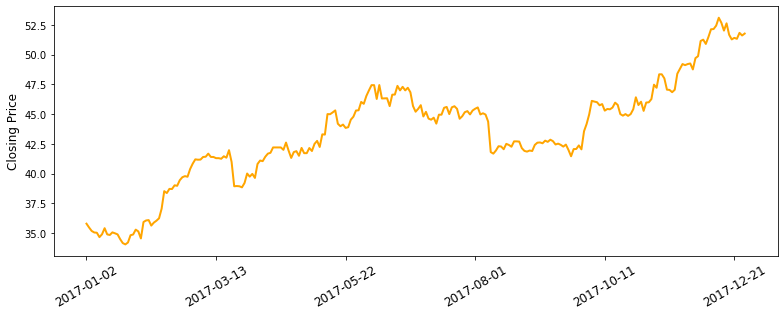

In [47]:
# Check the plot of closing prices to visually determine if the result of minimum change in 
# closing prices makes sense.

# Make figure + axes
fig, ax = plt.subplots(figsize=(11, 4.5),tight_layout=True)

ax.plot(closingPrices2017,color='orange',linewidth=2)
ax.set_ylabel('Closing Price',fontsize=12)

# Rotate the labels
[lab.set_rotation(30) for lab in ax.get_xticklabels()]

# ------------------------------------------------------------------------------------------
# Set the X-axis values using the matplotlib.pyplot.xticks() method
# First, get the default values for ticks on x-axis simply by commenting out the 
# following three lines of codes written between two dashed (--) lines: one above 
# and another below.
x = [0,50,100,150,200,250]
x_new = [dates2017[x[i]] for i in range(len(x))]
plt.xticks(x,x_new,fontsize=12)
# ------------------------------------------------------------------------------------------

plt.show()



The time-series plot above is same as what we have seen earlier at the beginning of this notebook in the last figure under section **Steps to verify {database_code} and {dataset_code}**. This verifies that we have extracted the data from quandl.com correctly.

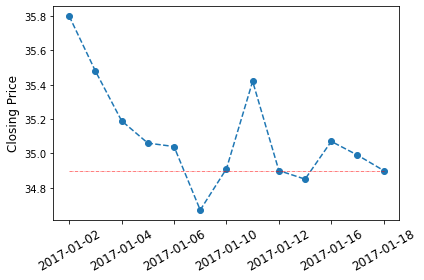

In [48]:
# Now zooming in the range of interest further !

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# Make figure + axes
fig, ax = plt.subplots(tight_layout=True)

ax.plot(closingPrices2017[0:13], 'o--')
ax.plot([closingPrices2017[8]]*len(closingPrices2017[0:13]),'r-.',linewidth=0.5)
ax.set_ylabel('Closing Price',fontsize=12)

# Rotate the labels
[lab.set_rotation(30) for lab in ax.get_xticklabels()]

# ------------------------------------------------------------------------------------------
# Set the X-axis values using the matplotlib.pyplot.xticks() method
# First, get the default values for ticks on x-axis simply by commenting out the 
# following three lines of codes (within the two -- dashed lines)
x = [0,2,4,6,8,10,12]
x_new = [dates2017[x[i]] for i in range(len(x))]
plt.xticks(x,x_new,fontsize=12)
# ------------------------------------------------------------------------------------------

plt.show()

The plot also shows that the closing prices on the 2017-01-12 and 2017-01-18 simply happen to be exactly the same by sheer luck!

In [49]:
# The data points of closing prices in the above plot correspond to the following dates
dates2017[0:13]

['2017-01-02',
 '2017-01-03',
 '2017-01-04',
 '2017-01-05',
 '2017-01-06',
 '2017-01-09',
 '2017-01-10',
 '2017-01-11',
 '2017-01-12',
 '2017-01-13',
 '2017-01-16',
 '2017-01-17',
 '2017-01-18']

### Task 6

In [50]:
# Task 6: What was the average daily trading volume during this year of 2017?

tradingVolumes2017 = extractColumn(json_data2017,'Traded Volume')
print(None in tradingVolumes2017, len(tradingVolumes2017))
meanTradingVolumes2017 = findMean(tradingVolumes2017)
print(fontstyle.BOLD + fontstyle.BACKGROUNDYELLOW + 'The average daily trading volume during 2017 was', str(round(meanTradingVolumes2017,2)) + '.' + fontstyle.END)


False 255
The average daily trading volume during 2017 was 89124.34.


Note that there are NO missing values in daily trading volumes.

### Task 7 (Optional)

In [51]:
# Task 7 (Optional): What was the median trading volume during this year of 2017?

medianTradingVolumes2017 = findMedian(tradingVolumes2017)
print(fontstyle.BOLD + fontstyle.BACKGROUNDYELLOW + 'The median daily trading volume during 2017 was', str(medianTradingVolumes2017) + fontstyle.END)


The median daily trading volume during 2017 was 76286.0


Median is less than mean. It means that the histogram or probability density function of `Traded Volume` is right skewed. We will now verify it below.

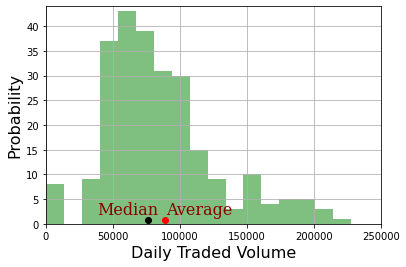

In [52]:
# Draw histogram to visually verify the mean and median
# the histogram of the data

n, bins, patches = plt.hist(tradingVolumes2017, 50, facecolor='g', alpha=0.5)
plt.xlabel('Daily Traded Volume',fontsize=16)
plt.ylabel('Probability',fontsize=16)
plt.xlim(0, 250000)
plt.ylim(0, 44)
plt.grid(True)

plt.plot(meanTradingVolumes2017,0.7,'ro')
plt.text(1.01*meanTradingVolumes2017, 2, 'Average',fontdict=font)

plt.plot(medianTradingVolumes2017,0.7,'ko')
plt.text(0.5*medianTradingVolumes2017, 2, 'Median',fontdict=font)
plt.show()

In [53]:
n, bins

(array([ 8.,  0.,  9., 37., 43., 39., 31., 30., 15.,  9.,  3., 10.,  4.,
         5.,  5.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([4.5000000e+01, 1.3451080e+04, 2.6857160e+04, 4.0263240e+04,
        5.3669320e+04, 6.7075400e+04, 8.0481480e+04, 9.3887560e+04,
        1.0729364e+05, 1.2069972e+05, 1.3410580e+05, 1.4751188e+05,
        1.6091796e+05, 1.7432404e+05, 1.8773012e+05, 2.0113620e+05,
        2.1454228e+05, 2.2794836e+05, 2.4135444e+05, 2.5476052e+05,
        2.6816660e+05, 2.8157268e+05, 2.9497876e+05, 3.0838484e+05,
        3.2179092e+05, 3.3519700e+05, 3.4860308e+05, 3.6200916e+05,
        3.7541524e+05, 3.8882132e+05, 4.0222740e+05, 4.1563348e+05,
        4.2903956e+05, 4.4244564e+05, 4.5585172e+05, 4.6925780e+05,
        4.8266388e+05, 4.9606996e+05, 5.0947604e+05, 5.2288212e+05,
        5.3628820e+05, 5.4969428e+05

The histogram or the probability density function plot does show that it is a positively skewed or right-skewed distribution with most values clustering around the left tail while the right tail is longer. The right tail actually extends beyond the value of 600,000. In fact, there are 2 data points with values between 300,000 and 400,000, and 1 data points between 600,000 and 700,000. These 3 points are not shown in the plot above.